In [306]:
import numpy as np

# Function created to initialize the Item vector - implement one that gets the data from a .txt file
# https://awari.com.br/vetor-python-aprenda-a-utilizar-a-linguagem-de-programacao-para-manipular-vetores/
def askForItens():
    qntd_itens = int(input("Type the number of items:"))
    #Create maze with dimension 2xItems    
    matriz = np.zeros((2, qntd_itens))
    
    ## Fill Valor
    for i in range(qntd_itens):
        matriz[0][i] = int(input(f"Type the Value for each item {i+1}:"))
    ## Fill Peso
    for i in range(qntd_itens):
        matriz[1, i] = float(input(f"Type the Weight for each item {i+1}: "))
    return matriz

In [307]:
import numpy as np

def mochilaInicial(n):
    # Gerando valores aleatórios para pesos e valores dos itens
    pesos = np.random.randint(0, 16, size=n)
    valores = np.random.randint(0, 16, size=n)

    # Construindo a matriz com pesos e valores
    matriz = np.array([pesos, valores])

    return matriz

def capacidadeMochila(matriz):
    somaTotal = np.sum(matriz[0])
    percentage = 0.35
    capacidade = int(somaTotal * percentage)
    return capacidade

def checkMatriz(matriz1, matriz2):
    # Verifica se as duas matrizes são exatamente iguais
    return np.array_equal(matriz1, matriz2)

In [308]:
# Fornecer uma opção randomica de itens que estariam inseridos nessa primeira lista de solução
def initRandom(size):
    # 100% random! 
    randomVector = np.random.choice([0, 1], size=size)
    return randomVector

In [309]:
import random
import math

# Calcular o valor total a mochila com os itens dentro dela
def calculate_value(solution, original, capacity):
    total_weight = 0
    total_value = 0

    # Loop para percorrer o vetor inteiro
    for i in range(len(solution)):
        # Calcular o peso e valor total para cada item que estiver presente 
        if(solution[i] == 1):
            # Coluna o item que foi selecionado
            total_weight += original[0][i]
            total_value += original[1][i]
            # Desconsidera se tiver ultrapassado a capacidade
            if(total_weight > capacity):
                # Retorna um valor negativo para indicar que estourou
                return 0
    return total_value

In [310]:
def RandomNeighbor(solution):
    # [:] é utilizado para criar uma cópia sem referenciar o mesmo espaço de memória
    # já que, se for apontando os 2 para o mesmo lugar, se eu alterar altera ambos - PARA VETORES
    tempSolution = solution[:]
    # Ver quais itens estarão na mochila - pelo índice 
    index = random.randint(0, len(solution) - 1)
    # 1 - 0 = 1  e  1 - 1 = 0
    tempSolution[index] = 1 - tempSolution[index]  # inverte o valor de 0 para 1 ou de 1 para 0
    return tempSolution

In [311]:

#Quantidade de Itens 
n = 14
originalValues = mochilaInicial(n)
print(originalValues)
capacity = capacidadeMochila(originalValues)
print(capacidadeMochila(originalValues))

[[ 9 10  6  7 13 11  9  9  9  1  9  8  4 15]
 [15  7  0 13 13 14 15  4  7  8  3  7 10 10]]
42


In [312]:
import copy
def solveKnapsack():
    # Perguntar a capacidade total da Mochila
    # capacity = int(input("Bag Capacity: "))
    #capacity = 20


    # Comecar perguntando sobre os items
    #originalValues = askForItens()
    #originalValues = np.array([
    #[2, 3, 4, 5, 9, 7, 1, 6, 4, 8, 3, 5],  # Pesos
    #[3, 4, 5, 8, 10, 7, 2, 9, 6, 12, 5, 7]  # Valores
    #[12, 7, 11, 8, 9, 15, 6, 4, 13, 8, 12, 9, 7, 5, 11, 6, 10, 4, 9, 7],
    #[24, 13, 23, 15, 16, 30, 10, 8, 25, 20, 24, 17, 14, 12, 23, 9, 21, 7, 19, 13]
    #])

    # Definir estados Iniciais - Aleatório
    currentSolution = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    #currentSolution = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]


    currentValue = calculate_value(currentSolution, originalValues, capacity)
    #print(f"Vetor Inicial: {initialSolution}")
    #print(f"Valor Atual: {currentValue}")

    # A melhor solução é a que se tem no momento
    bestSolution = currentSolution[:]
    bestValue = currentValue

    # Temperatura inicial
    # Temperatura recebe um valor "aleatório" que vai dimiuindo conforme aumentar o número e iterações
    temperature = 10000
    decreaseFactor = 1
    #decreaseFactor = 0.99
    stopTemp = 9

    # Stuck count para "sair" de loops ruins
    # NAO ALTERAR A TEMPERATURA MANUALMENTE!
    stuckCount = 0
    maxStuckCount = 1000

    igualZero = 0 
    totalIteracoes = 0
    countPior = 0
    lastAcepted = 0
    lastValueRandom = 0
    lastMath = 0  
    lastTemp = 0

    # Loop infinito - O critério de parada é se não vai aceitar mais variações ("Temperatura"<=0)
    # Loop infinito - O critério de parada é se não vai aceitar mais variações ("Temperatura"<=0)
    while temperature > stopTemp:
        # Ver Neighbor
        Neighbor = RandomNeighbor(currentSolution)
        valorNeighbor = calculate_value(Neighbor, originalValues, capacity)
        #print(valorNeighbor)
        
        if valorNeighbor != 0:    
            lastSolution = copy.deepcopy(currentSolution)
            # Fit = Próximo - Atual > para ver se é melhor que a atual
            fitness = valorNeighbor - currentValue
            totalIteracoes= totalIteracoes + 1
            # Se Valor Neighbor for MAIOR que o valor ATUAL
            if fitness > 0:
                # Se for MAIOR: Atual = Próximo
                currentSolution = copy.deepcopy(Neighbor)
                currentValue = valorNeighbor
                lastAcepted = 1
            # Se NÃO for MAIOR
            else:
                # Se existe a probabilidade de aceitar
                lastValueRandom = random.uniform(0, 1)
                lastMath = math.exp(fitness / temperature)
                if lastValueRandom < lastMath:
                    # Então Atual = Próximo
                    countPior = countPior + 1
                    currentSolution = copy.deepcopy(Neighbor)
                    currentValue = valorNeighbor
                    lastAcepted = 2
            
            # Guarda o maior
            if currentValue > bestValue:
                bestValue = currentValue
                bestSolution = copy.deepcopy(currentSolution)

            #temperature = temperature * decreaseFactor
            temperature = temperature - decreaseFactor
            lastTemp = temperature
        else:
            igualZero = igualZero + 1

    #print(lastAcepted)
    #print(f"Total de iteracoes validas: {totalIteracoes}")
    #print(f"Total de iteracoes invalidas: {igualZero}")
    #print(f"Aceitou o pior: {countPior}")
    #print(f"random: {lastValueRandom}   lastExp: {lastMath}    lastTemp: {lastTemp}")
    return bestSolution, bestValue, lastSolution, lastTemp


In [325]:
bestSolution, bestValue, lastSolution, lastTemp= solveKnapsack()
print(f'Sao iguais? {checkMatriz(bestSolution,lastSolution)}')
print(f'Melhor valor: valor {bestValue}')
totalLast = calculate_value(lastSolution, originalValues, capacity)
print(f'total last value: {totalLast}')
print(f'{lastSolution} Last value')
print(f'{bestSolution} Melhor solução')
print(f'{lastTemp:.2f} Ultima temp')

1
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 5958
Aceitou o pior: 5389
random: 0.6628598903470151   lastExp: 0.4965853037914095    lastTemp: 9
Sao iguais? False
Melhor valor: valor 75
total last value: 54
[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0] Last value
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0] Melhor solução
9.00 Ultima temp


1
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 6168
Aceitou o pior: 5388
random: 0.7889001657259923   lastExp: 0.22313016014842982    lastTemp: 9
2
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 6225
Aceitou o pior: 5395
random: 0.5461462337794492   lastExp: 1.0    lastTemp: 9
1
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 6026
Aceitou o pior: 5396
random: 0.42739672410497875   lastExp: 0.22313016014842982    lastTemp: 9
1
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 6400
Aceitou o pior: 5429
random: 0.06872280582894241   lastExp: 0.583645478143574    lastTemp: 9
2
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 5976
Aceitou o pior: 5396
random: 0.3346501314868844   lastExp: 1.0    lastTemp: 9
2
Total de iteracoes validas: 9991
Total de iteracoes invalidas: 6141
Aceitou o pior: 5378
random: 0.7656553092580914   lastExp: 1.0    lastTemp: 9
1
Total de iteracoes validas: 9991
Total de iteracoes invalidas:

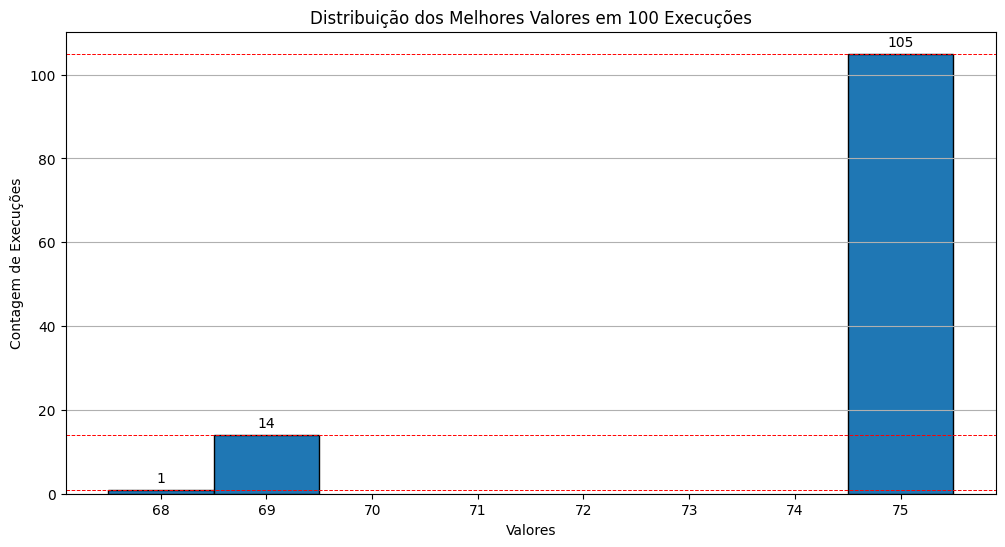

In [326]:
import numpy as np
import random
import math
import copy
import matplotlib.pyplot as plt

# [Assumindo que sua função solveKnapsack já está definida anteriormente]

results = []
num_iterations = 120  # Número de execuções
for i in range(num_iterations):
    bestSolution, bestValue, lastSolution, lastTemp = solveKnapsack()
    results.append(bestValue)

# Obter todos os valores únicos e suas contagens
unique_values, counts = np.unique(results, return_counts=True)

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(unique_values, counts, width=1, edgecolor='black', align='center')
plt.xlabel('Valores')
plt.ylabel('Contagem de Execuções')
plt.title('Distribuição dos Melhores Valores em 100 Execuções')
plt.xticks(np.arange(min(unique_values), max(unique_values) + 1, 1))  # Definindo o eixo X de 1 em 1
plt.grid(axis='y')  # Adicionando grade para facilitar a visualização

# Adicionar linhas pontilhadas nos valores do eixo Y
for i in range(len(counts)):
    plt.axhline(y=counts[i], color='red', linestyle='--', linewidth=0.7)  # Linha pontilhada
    plt.text(unique_values[i], counts[i] + 1, str(counts[i]), ha='center', va='bottom')  # Adiciona o valor em cima da barra

plt.show()
